# **Libraries**

In [1]:
# import library
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#**Importation des données**  

In [2]:
# Ajustez le chemin selon l'emplacement réel de votre fichier
# data = pd.read_csv('guillaume.txt', sep=';')

In [3]:
import dask.dataframe as dd
import time

depart = time.perf_counter()

# Charger le fichier en considérant toutes les colonnes comme des objets (texte)
data = dd.read_csv("guillaume.txt", sep=";", dtype=str)

print("Temps de chargement read_csv (virtuel) =", time.perf_counter() - depart)
print(data.dtypes)  # Vérifier que toutes les colonnes sont bien en "object"

# Convertir en DataFrame Pandas si nécessaire
data = data.compute()
print(data.info())  # Vérifier la structure finale


Temps de chargement read_csv (virtuel) = 0.07127640000544488
ZIBZIN                      string[pyarrow]
IDAvisAutorisationCheque    string[pyarrow]
FlagImpaye                  string[pyarrow]
Montant                     string[pyarrow]
DateTransaction             string[pyarrow]
CodeDecision                string[pyarrow]
VerifianceCPT1              string[pyarrow]
VerifianceCPT2              string[pyarrow]
VerifianceCPT3              string[pyarrow]
D2CB                        string[pyarrow]
ScoringFP1                  string[pyarrow]
ScoringFP2                  string[pyarrow]
ScoringFP3                  string[pyarrow]
TauxImpNb_RB                string[pyarrow]
TauxImpNB_CPM               string[pyarrow]
EcartNumCheq                string[pyarrow]
NbrMagasin3J                string[pyarrow]
DiffDateTr1                 string[pyarrow]
DiffDateTr2                 string[pyarrow]
DiffDateTr3                 string[pyarrow]
CA3TRetMtt                  string[pyarrow]
CA3TR          

In [4]:
data.describe()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774
unique,1280127,3812040,3,42864,3097882,6,15,23,31,552,2079260,3035594,3186793,663,82,15438,6,154511,51510,12665,67973,35316,49512
top,A075000041908023367242120,78643047,0,30,2017-03-04 17:18:31,0,0,0,0,1,0,0,0,"45,36831264567185","52,076033757361408",0,1,4,4,4,30,0,40646
freq,217,2,4616778,37028,14,3502786,3618656,3618656,3618656,941716,677840,678108,678120,202994,445066,4068588,4477709,3162537,3605264,3672048,32497,4068163,209


# **Exploration des donées**

In [5]:
# shape
data.shape

(4646774, 23)

# **Traitement de données**

In [6]:
def nettoyer_colonnes_par_indices(data, indices_colonnes):
    """
    Nettoie plusieurs colonnes spécifiées par leurs indices en supprimant les espaces,
    convertissant les valeurs en numérique, supprimant les valeurs non valides,
    et en les convertissant en entiers.

    Args:
        data (pd.DataFrame): Le DataFrame à traiter.
        indices_colonnes (list): Liste des indices des colonnes à nettoyer.

    Returns:
        pd.DataFrame: Le DataFrame avec les colonnes nettoyées.
    """
    # Parcourir les indices des colonnes
    for indice in indices_colonnes:
        # Obtenir le nom de la colonne depuis l'indice
        colonne = data.columns[indice]

        # Supprimer les espaces
        data[colonne] = data[colonne].astype(str).str.strip()
        # Convertir en numérique (remplace les erreurs par NaN)
        data[colonne] = pd.to_numeric(data[colonne], errors='coerce')
        # Supprimer les lignes avec des NaN dans la colonne
        data = data.dropna(subset=[colonne])
        # Convertir les valeurs en entiers
        data[colonne] = data[colonne].astype(int)

    return data

In [7]:
# Liste des indices des colonnes à nettoyer
indices_colonnes = [1,2,5,6,7,8,9,15,16,22]

# Nettoyage des colonnes
data = nettoyer_colonnes_par_indices(data, indices_colonnes)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_19624\3867840830.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(int)
C:\Users\Evidya\AppData\Local\Temp\ipykernel_19624\3867840830.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(str).str.strip()
C:\Users\Evidya\AppData\Local\Temp\ipykernel_19624\3867840830.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [8]:
# verifier les types de mes données
data.dtypes

ZIBZIN                      string[pyarrow]
IDAvisAutorisationCheque              int64
FlagImpaye                            int64
Montant                     string[pyarrow]
DateTransaction             string[pyarrow]
CodeDecision                          int64
VerifianceCPT1                        int64
VerifianceCPT2                        int64
VerifianceCPT3                        int64
D2CB                                  int64
ScoringFP1                  string[pyarrow]
ScoringFP2                  string[pyarrow]
ScoringFP3                  string[pyarrow]
TauxImpNb_RB                string[pyarrow]
TauxImpNB_CPM               string[pyarrow]
EcartNumCheq                          int64
NbrMagasin3J                          int64
DiffDateTr1                 string[pyarrow]
DiffDateTr2                 string[pyarrow]
DiffDateTr3                 string[pyarrow]
CA3TRetMtt                  string[pyarrow]
CA3TR                       string[pyarrow]
Heure                           

In [9]:
col_flot = ["Montant", "TauxImpNb_RB","TauxImpNB_CPM", "CA3TRetMtt", "CA3TR","ScoringFP1", 	"ScoringFP2", 	"ScoringFP3"]
col_str = ["ZIBZIN","IDAvisAutorisationCheque"]
co_date = ["DateTransaction"]
col_heure = ["Heure"]
# recuperer toutes les colonnnes qui ne foont pas parti de col_flot, col_str, col_heure, col_date dans col_int
col_int = [col for col in data.columns if col not in col_flot and col not in col_str and col not in col_heure and col not in co_date]
# afficher le nombre de chacune des liste
print("col_flot :", len(col_flot))
print("col_str :", len(col_str))
print("col_int :", len(col_int))
print("co_date :", len(co_date))
print("col_heure :", len(col_heure))

col_flot : 8
col_str : 2
col_int : 11
co_date : 1
col_heure : 1


In [10]:
for col in col_flot:
    # Remplacer les virgules par des points dans les colonnes de type string
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)

    # Convertir les colonnes au type float
    data[col] = data[col].astype(float)

In [11]:
# Convertir en int
for col in col_int:
    # Vérifier si la colonne n'est pas déjà de type int
    if data[col].dtype != 'int64':
        # Remplacer les virgules par des points, si nécessaire
        data[col] = data[col].astype(str).str.replace(',', '.')
        # Convertir en type float puis en int (pour éviter les problèmes avec les décimales)
        data[col] = data[col].astype(float).astype(int)

In [12]:
# convertir la col_date en type date
data['DateTransaction'] = pd.to_datetime(data['DateTransaction'])


In [13]:
# Conversion des secondes depuis minuit en format timedelta
data['Heure'] = pd.to_timedelta(data['Heure'], unit='s')

# Convertir en format HH:MM:SS en chaîne (ou datetime.time si nécessaire)
data['Heure'] = data['Heure'].apply(lambda x: (pd.Timestamp("00:00:00") + x).time())

In [14]:
# afficher les colonnes transformées
data.head(10)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,0.000000,0.000000,0.000000,37.186668,52.076034,0,1,4,4,4,20.00,0.00,07:32:14
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,0.000000,0.000000,0.000000,48.844716,52.076034,1,2,1,4,4,28.61,8.61,07:43:37
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4,4,4,57.64,0.00,07:47:38
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,0.000000,0.000000,0.000000,110.056926,53.554234,0,1,4,4,4,54.29,0.00,07:48:48
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1,4,4,59.15,32.25,08:13:27
5,A044014706908021215591000,78643049,0,42.51,2017-02-01 08:13:53,1,0,0,0,523,0.000000,0.000000,0.000000,24.223058,27.448962,0,1,4,4,4,42.51,0.00,08:13:53
6,A059010041908012913210426,78643050,0,50.84,2017-02-01 08:18:24,1,0,0,0,551,0.006151,12.929167,0.001146,44.775178,52.076034,0,1,4,4,4,50.84,0.00,08:18:24
7,A013000077908491210714030,78643051,0,87.14,2017-02-01 08:19:28,1,0,0,0,547,0.007965,18.189001,0.001130,30.935808,52.076034,0,1,4,4,4,87.14,0.00,08:19:28
8,A055054707908007521756697,78643052,0,40.00,2017-02-01 08:20:13,1,0,0,0,548,0.000000,0.000000,0.000000,0.000000,35.493265,0,1,4,4,4,40.00,0.00,08:20:13
9,A013010041908001298460129,78643053,0,90.59,2017-02-01 08:24:09,1,0,0,0,538,0.006476,26.010078,0.001095,45.368313,52.076034,0,1,4,4,4,90.59,0.00,08:24:09


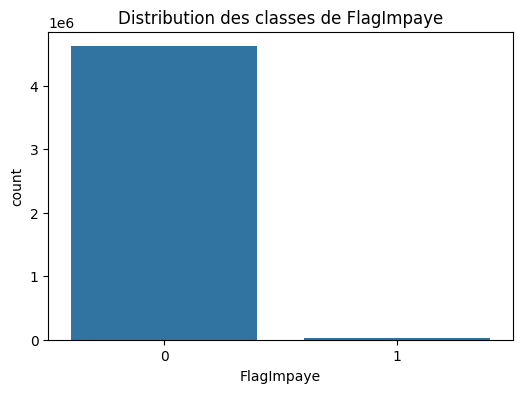

In [15]:
# Distribution des classes de la variable cible 'FlagImpaye'
target = "FlagImpaye"
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=data)
plt.title('Distribution des classes de FlagImpaye')
plt.show()

## **Calculer les fréquences des classes**

In [16]:
# Calcul des fréquences des classes
class_counts = data['FlagImpaye'].value_counts()

# Classe majoritaire et minoritaire
majority_class = class_counts.max()
minority_class = class_counts.min()

# Calcul de l'écart entre les classes
gap = majority_class - minority_class
print(f"\nClasse majoritaire : {majority_class}")
print(f"Classe minoritaire : {minority_class}")
print(f"Écart des classes : {gap}")


Classe majoritaire : 4616778
Classe minoritaire : 29995
Écart des classes : 4586783


## **Calculer les pourcentages pour mieux visualiser**

In [17]:
# Calcul des pourcentages
total = class_counts.sum()
percentages = class_counts / total * 100


# Afficher l'écart en pourcentage
majority_percentage = percentages.max()
minority_percentage = percentages.min()
gap_percentage = majority_percentage - minority_percentage

print(f"\nPourcentage de la classe majoritaire : {majority_percentage:.2f}%")
print(f"Pourcentage de la classe minoritaire : {minority_percentage:.2f}%")
print(f"Écart en pourcentage : {gap_percentage:.2f}%")



Pourcentage de la classe majoritaire : 99.35%
Pourcentage de la classe minoritaire : 0.65%
Écart en pourcentage : 98.71%


In [18]:
# import sys 
# print(sys.version)
# import os
# os.environ["PYSPARK_PYTHON"]="python"

# from pyspark.sql import SparkSession

# # Création d'une session Spark
# spark = SparkSession.builder \
#     .appName("SparkML_Fouille_Donnees") \
#     .getOrCreate()

## **Séparation des features et la cible**

In [19]:
# Définir les plages de dates pour l'apprentissage et le test
train_start_date = "2017-02-01"
train_end_date = "2017-08-31"
test_start_date = "2017-09-01"
test_end_date = "2017-11-30"

In [20]:
# Séparer les ensembles d'apprentissage et de test
train_data = data[(data['DateTransaction'] >= train_start_date) & (data['DateTransaction'] <= train_end_date)]
test_data = data[(data['DateTransaction'] >= test_start_date) & (data['DateTransaction'] <= test_end_date)]


In [21]:
# Séparer les caractéristiques (X) et la variable cible (y)
X_train = train_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure','FlagImpaye','DateTransaction'], axis=1)
y_train = train_data['FlagImpaye']

X_test = test_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure','FlagImpaye','DateTransaction'], axis=1)
y_test = test_data['FlagImpaye']

In [22]:
# Vérifier les dimensions
print(f"Dimensions des données d'entraînement: {X_train.shape}, {y_train.shape}")
print(f"Dimensions des données de test: {X_test.shape}, {y_test.shape}")

Dimensions des données d'entraînement: (3888468, 18), (3888468,)
Dimensions des données de test: (737068, 18), (737068,)


In [23]:
historique = pd.DataFrame(columns=['model', 'sampling_alg', 'f1_score', 'auc', 'time_exec'])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Normalisation des données pour les modèles sensibles à l'échelle (ex : KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# y and X size
print(X_train_scaled.shape)
print(y_train.shape)

(3888468, 18)
(3888468,)


# **Rééchantillonnage**

## **Adasyn**

In [25]:
# Instancier ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)

In [26]:
# appliquer adasyn
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

In [27]:
# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_adasyn = pd.Series(y_train_resampled_adasyn).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classe, pourcentage in class_distribution_adasyn.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")


Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):
Classe 1: 50.01%
Classe 0: 49.99%


In [28]:
AdasynTrain = pd.DataFrame(X_train_resampled_adasyn, columns=X_train.columns)
AdasynTrain["flagimpaye"] = y_train_resampled_adasyn


In [29]:
# h2o.init(max_mem_size="16G")  # Par exemple, 8 Go de mémoire allouée
# import gc
# h2o.remove_all()  # Nettoie les objets H2O inutilisés
# gc.collect()  # Exécute le garbage collector Python

In [30]:

# Sauvegarder en Parquet
AdasynTrain.to_parquet("adasyn_train.parquet")

# Charger le fichier avec Spark
adasyn_df = dd.read_parquet("adasyn_train.parquet")


## **Random Over Sampling**

In [31]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling strategy
ros = RandomOverSampler(random_state=0)
X_train_oversampling, y_train_oversampling = ros.fit_resample(X_train_scaled, y_train)

In [32]:
# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_ros = pd.Series(y_train_oversampling).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classe, pourcentage in class_distribution_ros.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")

Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):
Classe 0: 50.00%
Classe 1: 50.00%


In [33]:
RosTrain = pd.DataFrame(X_train_oversampling, columns=X_train.columns)
RosTrain["flagimpaye"] = y_train_oversampling


In [34]:
# Sauvegarder en Parquet
RosTrain.to_parquet("ros_train.parquet")

# Charger le fichier avec Spark
ros_df = dd.read_parquet("ros_train.parquet")

In [35]:
# sampling with smote
from imblearn.over_sampling import SMOTE

# Instancier SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_scaled, y_train)

# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_smote = pd.Series(y_train_resampled_smote).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classe, pourcentage in class_distribution_smote.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")


Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):
Classe 0: 50.00%
Classe 1: 50.00%


In [36]:
SmoteTrain = pd.DataFrame(X_train_resampled_smote, columns=X_train.columns)
SmoteTrain["flagimpaye"] = y_train_resampled_smote


In [37]:
# Sauvegarder en Parquet
SmoteTrain.to_parquet("smote_train.parquet")

# Charger le fichier avec Spark
smote_df = dd.read_parquet("smote_train.parquet")


In [38]:
X_train.columns

Index(['Montant', 'CodeDecision', 'VerifianceCPT1', 'VerifianceCPT2',
       'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3',
       'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq', 'NbrMagasin3J',
       'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3', 'CA3TRetMtt', 'CA3TR'],
      dtype='object')

In [39]:
# X_test scaled to df
Test_Df = pd.DataFrame(X_test_scaled, columns=X_test.columns)




In [40]:
Test_Df["flagimpaye"] = y_test.to_list()

# Sauvegarder en Parquet
Test_Df.to_parquet("test_df.parquet")

# Charger le fichier avec Spark
test_Df = dd.read_parquet("test_df.parquet")

In [41]:
print(smote_df.dtypes)

Montant           float64
CodeDecision      float64
VerifianceCPT1    float64
VerifianceCPT2    float64
VerifianceCPT3    float64
D2CB              float64
ScoringFP1        float64
ScoringFP2        float64
ScoringFP3        float64
TauxImpNb_RB      float64
TauxImpNB_CPM     float64
EcartNumCheq      float64
NbrMagasin3J      float64
DiffDateTr1       float64
DiffDateTr2       float64
DiffDateTr3       float64
CA3TRetMtt        float64
CA3TR             float64
flagimpaye          int64
dtype: object


# **Analyse discriminante**

## **Sans rééchantillonnage**

16.112215500004822 sec.
Taux de reconnaissance(LDA):  0.9959718777643312
Taux d'erreur(LDA):  0.004028122235668841
f1score:  0.738989010989011
Axes(0.125,0.11;0.62x0.77)
aire: 0.9326276361469564


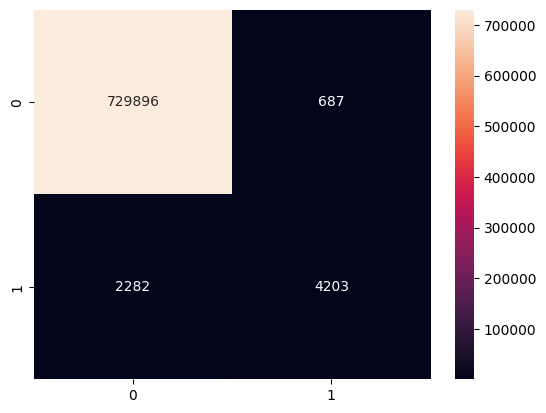

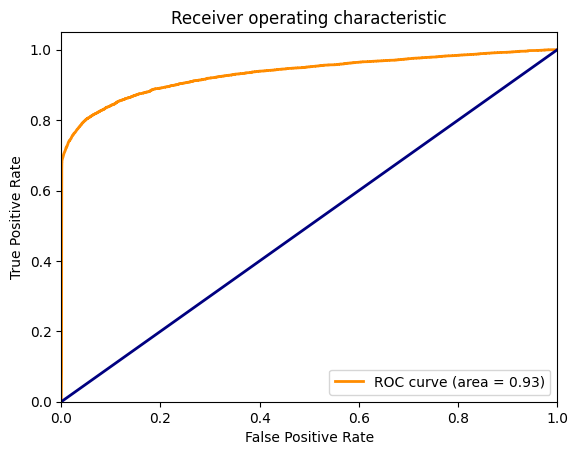

In [42]:
###################### ANALYSE DISCRIMINANTE LINEAIRE SANS RE-ECHANTILLONNAGE #################################

from sklearn import metrics
import timeit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#modélisation avec l'analyse discriminante
lda = LinearDiscriminantAnalysis()
depart = timeit.default_timer()
lda.fit(X_train,y_train)
duree = timeit.default_timer()- depart
print(str(duree)+" sec.")

# Prediction lda
pred_lda = lda.predict(X_test)
y_pred_proba = lda.predict_proba(X_test)[:,1]

# Le taux de reconnaissance
print("Taux de reconnaissance(LDA): ",metrics.accuracy_score(y_test,pred_lda))
print("Taux d'erreur(LDA): ",1-metrics.accuracy_score(y_test,pred_lda))
print("f1score: ",metrics.f1_score(y_test,pred_lda))



# Matrice de confusion
import seaborn as sns
mc= metrics.confusion_matrix(y_test, pred_lda)
print(sns.heatmap(mc, annot=True, fmt=".0f"))

#fonction pour la courbe ROC
from sklearn.metrics import roc_curve

#FPR et TPR
fpr,tpr,seuils = roc_curve(y_test,y_pred_proba,pos_label=1)

#fonction pour l'AUC
from sklearn.metrics import auc

#valeur de l'AUC
aire = auc(fpr,tpr)
print("aire:",aire)


#graphique
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Avec rééchantillonnage**

### Adasyn

Temps d'entraînement: 36.9563 sec.
Taux de reconnaissance (LDA avec ADASYN) : 0.7147373105330851
Taux d'erreur (LDA avec ADASYN) : 0.2852626894669149
F1-score : 0.03284298843595617
Axes(0.125,0.11;0.62x0.77)
aire: 0.6662469177837906


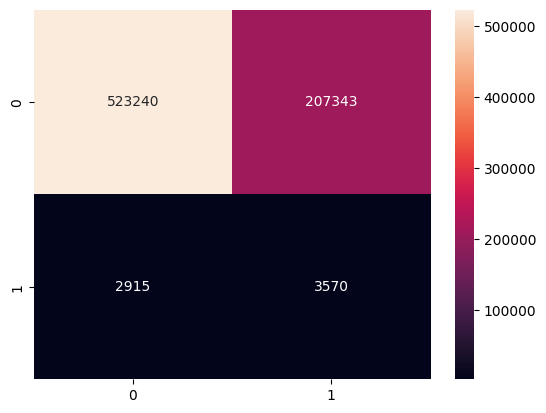

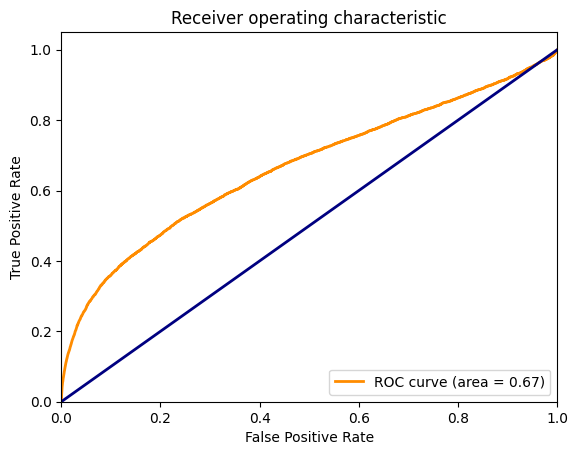

In [43]:
from sklearn import metrics
import timeit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Modélisation avec l'analyse discriminante linéaire (LDA)
lda = LinearDiscriminantAnalysis()
depart = timeit.default_timer()
lda.fit(X_train_resampled_adasyn, y_train_resampled_adasyn)  # Entraînement sur les données équilibrées
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur X_test
pred_lda = lda.predict(X_test_scaled)
y_pred_proba = lda.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (LDA avec ADASYN) :", metrics.accuracy_score(y_test, pred_lda))
print("Taux d'erreur (LDA avec ADASYN) :", 1 - metrics.accuracy_score(y_test, pred_lda))
print("F1-score :", metrics.f1_score(y_test, pred_lda))



# Matrice de confusion
mc= metrics.confusion_matrix(y_test, pred_lda)
print(sns.heatmap(mc, annot=True, fmt=".0f"))


#FPR et TPR
fpr,tpr,seuils = roc_curve(y_test,y_pred_proba,pos_label=1)

#valeur de l'AUC
aire = auc(fpr,tpr)
print("aire:",aire)

#graphique
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Random over sampling

Temps d'entraînement: 26.5982 sec.
Taux de reconnaissance (LDA avec Random Over sampling) : 0.9717203840079884
Taux d'erreur (LDA avec Random Over sampling) : 0.028279615992011564
F1-score : 0.3212634321068056
Axes(0.125,0.11;0.62x0.77)
aire: 0.9329271065319005


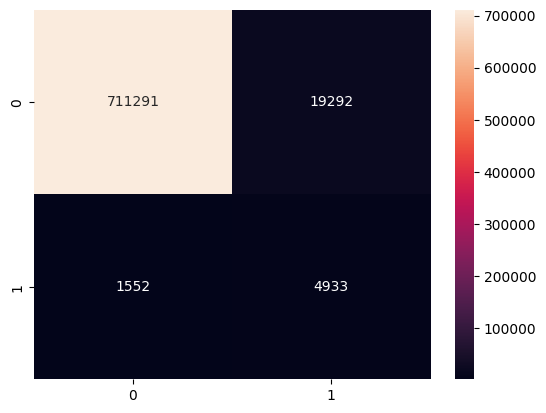

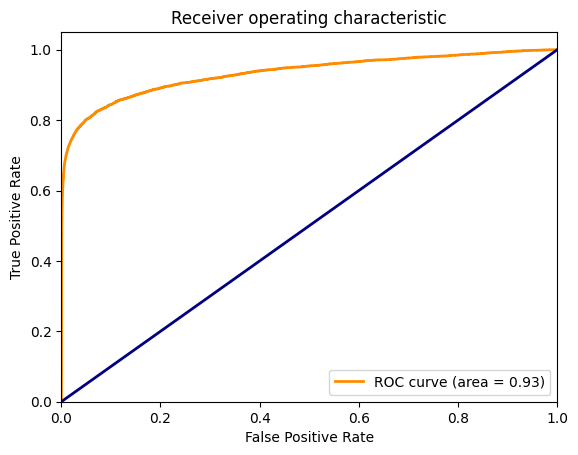

In [44]:

# Modélisation avec l'analyse discriminante linéaire (LDA)
lda = LinearDiscriminantAnalysis()
depart = timeit.default_timer()
lda.fit(X_train_oversampling, y_train_oversampling)  # Entraînement sur les données équilibrées
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur X_test
pred_lda = lda.predict(X_test_scaled)
y_pred_proba = lda.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (LDA avec Random Over sampling) :", metrics.accuracy_score(y_test, pred_lda))
print("Taux d'erreur (LDA avec Random Over sampling) :", 1 - metrics.accuracy_score(y_test, pred_lda))
print("F1-score :", metrics.f1_score(y_test, pred_lda))



# Matrice de confusion
mc= metrics.confusion_matrix(y_test, pred_lda)
print(sns.heatmap(mc, annot=True, fmt=".0f"))


#FPR et TPR
fpr,tpr,seuils = roc_curve(y_test,y_pred_proba,pos_label=1)

#valeur de l'AUC
aire = auc(fpr,tpr)
print("aire:",aire)

#graphique
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### SMOTE

Temps d'entraînement: 25.1979 sec.
Taux de reconnaissance (LDA avec SMOTE) : 0.9699200073805945
Taux d'erreur (LDA avec SMOTE) : 0.030079992619405527
F1-score : 0.3086900938542609
Axes(0.125,0.11;0.62x0.77)
aire: 0.9326106188653842


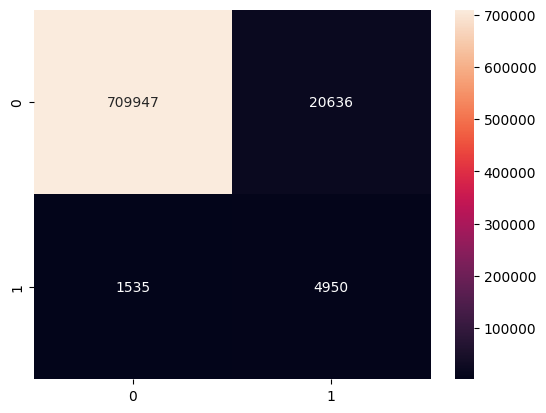

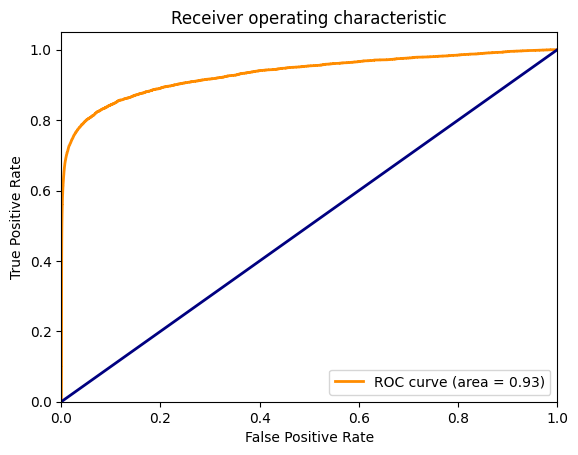

In [45]:

# Modélisation avec l'analyse discriminante linéaire (LDA)
lda = LinearDiscriminantAnalysis()
depart = timeit.default_timer()
lda.fit(X_train_resampled_smote, y_train_resampled_smote)  # Entraînement sur les données équilibrées
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur X_test
pred_lda = lda.predict(X_test_scaled)
y_pred_proba = lda.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (LDA avec SMOTE) :", metrics.accuracy_score(y_test, pred_lda))
print("Taux d'erreur (LDA avec SMOTE) :", 1 - metrics.accuracy_score(y_test, pred_lda))
print("F1-score :", metrics.f1_score(y_test, pred_lda))



# Matrice de confusion
mc= metrics.confusion_matrix(y_test, pred_lda)
print(sns.heatmap(mc, annot=True, fmt=".0f"))


#FPR et TPR
fpr,tpr,seuils = roc_curve(y_test,y_pred_proba,pos_label=1)

#valeur de l'AUC
aire = auc(fpr,tpr)
print("aire:",aire)

#graphique
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Random under sampling

In [57]:
# under sampling
from imblearn.under_sampling import RandomUnderSampler

# Undersampling strategy
rus = RandomUnderSampler(random_state=0)
X_train_undersampling, y_train_undersampling = rus.fit_resample(X_train_scaled, y_train)

# Calculer la distribution des classes en pourcentage apres sous -echantillonnage
class_distribution_rus = pd.Series(y_train_undersampling).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sous-échantillonnage (%):")
for classe, pourcentage in class_distribution_rus.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")

Distribution des classes de 'FlagImpaye' après sous-échantillonnage (%):
Classe 0: 50.00%
Classe 1: 50.00%


Temps d'entraînement: 0.1546 sec.
Taux de reconnaissance (LDA avec RUS) : 0.9707408271692707
Taux d'erreur (LDA avec RUS) : 0.02925917283072932
F1-score : 0.3156257933485656
Axes(0.125,0.11;0.62x0.77)
aire: 0.9334658682842715


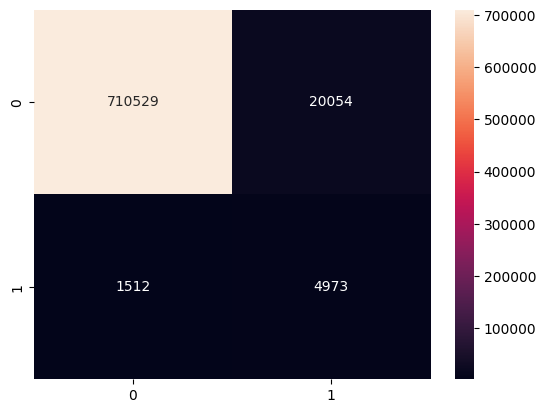

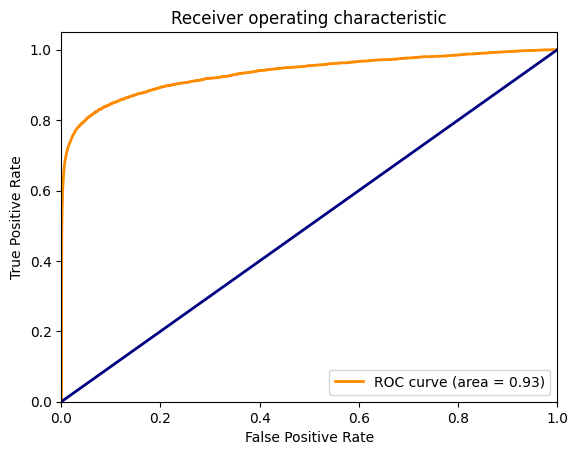

In [58]:

# Modélisation avec l'analyse discriminante linéaire (LDA)
lda = LinearDiscriminantAnalysis()
depart = timeit.default_timer()
lda.fit(X_train_undersampling, y_train_undersampling)  # Entraînement sur les données équilibrées
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur X_test
pred_lda = lda.predict(X_test_scaled)
y_pred_proba = lda.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (LDA avec RUS) :", metrics.accuracy_score(y_test, pred_lda))
print("Taux d'erreur (LDA avec RUS) :", 1 - metrics.accuracy_score(y_test, pred_lda))
print("F1-score :", metrics.f1_score(y_test, pred_lda))



# Matrice de confusion
mc= metrics.confusion_matrix(y_test, pred_lda)
print(sns.heatmap(mc, annot=True, fmt=".0f"))


#FPR et TPR
fpr,tpr,seuils = roc_curve(y_test,y_pred_proba,pos_label=1)

#valeur de l'AUC
aire = auc(fpr,tpr)
print("aire:",aire)

#graphique
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# **Modeles**

Nous allons tester plusieurs algorithmes couramment utilisés pour les données déséquilibrées :

- Random Forest
- XGBoost
- Réseaux de neurones
- Logistique regression


In [46]:
from dask.distributed import Client

# Lancer un client Dask (utile pour voir les tâches en arrière-plan)
client = Client()
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.89 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63648,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.89 GiB
Comm: tcp://127.0.0.1:63667,Total threads: 2
Dashboard: http://127.0.0.1:63669/status,Memory: 3.97 GiB
Nanny: tcp://127.0.0.1:63651,


In [ ]:
# adasyn_df = dd.from_pandas(adasyn_df, npartitions=4)  # npartitions = nombre de cœurs CPU
# test_Df = dd.from_pandas(test_Df, npartitions=4)  # npartitions = nombre de cœurs CPU


### Logistic Regression

In [47]:
# apprentissage avec log regression
from sklearn.linear_model import LogisticRegression

# Instancier le modèle
log_reg = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données équilibrées
depart = timeit.default_timer()
log_reg.fit(X_train_oversampling, y_train_oversampling)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Logistic Regression avec ROS) :", metrics.accuracy_score(y_test, pred_log_reg))

Temps d'entraînement: 25.8036 sec.
Taux de reconnaissance (Logistic Regression avec ROS) : 0.9433770018505755


In [49]:
# historisation
new_entry = pd.DataFrame([{
    'model': 'Logistic Regression',
    'sampling_alg': 'ROS',
    'f1_score': metrics.f1_score(y_test, pred_log_reg),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_19624\518543863.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  historique = pd.concat([historique, new_entry], ignore_index=True)


In [65]:
# apprentissage avec log regression
from sklearn.linear_model import LogisticRegression

# Instancier le modèle
log_reg = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données équilibrées
depart = timeit.default_timer()
log_reg.fit(X_train_undersampling, y_train_undersampling)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Logistic Regression avec RUS) :", metrics.accuracy_score(y_test, pred_log_reg))

# historisation
new_entry = pd.DataFrame([{
    'model': 'Logistic Regression',
    'sampling_alg': 'RUS',
    'f1_score': metrics.f1_score(y_test, pred_log_reg),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

Temps d'entraînement: 0.1710 sec.
Taux de reconnaissance (Logistic Regression avec RUS) : 0.9403799920767147


In [66]:
# apprentissage avec log regression
from sklearn.linear_model import LogisticRegression

# Instancier le modèle
log_reg = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données équilibrées
depart = timeit.default_timer()
log_reg.fit(X_train_resampled_smote, y_train_resampled_smote)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Logistic Regression avec SMOTE) :", metrics.accuracy_score(y_test, pred_log_reg))

# historisation
new_entry = pd.DataFrame([{
    'model': 'Logistic Regression',
    'sampling_alg': 'SMOTE',
    'f1_score': metrics.f1_score(y_test, pred_log_reg),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

Temps d'entraînement: 15.3551 sec.
Taux de reconnaissance (Logistic Regression avec SMOTE) : 0.9422889068579833


## **Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
rf_model.fit(X_train_oversampling, y_train_oversampling)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Random Forest avec ROS) :", metrics.accuracy_score(y_test, pred_rf))


Temps d'entraînement: 5009.0790 sec.
Taux de reconnaissance (Random Forest avec ROS) : 0.9968089782760885


In [67]:
# historisation
new_entry = pd.DataFrame([{
    'model': 'Random Forest',
    'sampling_alg': 'ROS',
    'f1_score': metrics.f1_score(y_test, pred_rf),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

In [69]:

# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
rf_model.fit(X_train_resampled_smote, y_train_resampled_smote)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Random Forest avec SMOTE) :", metrics.accuracy_score(y_test, pred_rf))


Temps d'entraînement: 6961.7509 sec.
Taux de reconnaissance (Random Forest avec SMOTE) : 0.9955119473372878


In [70]:
# historisation
new_entry = pd.DataFrame([{
    'model': 'Random Forest',
    'sampling_alg': 'SMOTE',
    'f1_score': metrics.f1_score(y_test, pred_rf),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

In [71]:

# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
rf_model.fit(X_train_undersampling, y_train_undersampling)
duree = timeit.default_timer() - depart
print(f"Temps d'entraînement: {duree:.4f} sec.")

# Prédiction sur les données de test
pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# Évaluation des performances
print("Taux de reconnaissance (Random Forest avec SMOTE) :", metrics.accuracy_score(y_test, pred_rf))


Temps d'entraînement: 7017.9853 sec.
Taux de reconnaissance (Random Forest avec SMOTE) : 0.9243068482148187


In [72]:
# historisation
new_entry = pd.DataFrame([{
    'model': 'Random Forest',
    'sampling_alg': 'RUS',
    'f1_score': metrics.f1_score(y_test, pred_rf),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

## **XGBoost**

In [73]:
# Initialiser et entraîner le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(X_train_oversampling, y_train_oversampling)
# Prédictions et évaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:,1]
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# historisation
new_entry = pd.DataFrame([{
    'model': 'xgboost',
    'sampling_alg': 'ROS',
    'f1_score': metrics.f1_score(y_test, y_pred_xgb),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    730583
           1       0.09      0.82      0.17      6485

    accuracy                           0.93    737068
   macro avg       0.55      0.88      0.57    737068
weighted avg       0.99      0.93      0.96    737068



In [74]:
# Initialiser et entraîner le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(X_train_resampled_smote, y_train_resampled_smote)
# Prédictions et évaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:,1]
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# historisation
new_entry = pd.DataFrame([{
    'model': 'xgboost',
    'sampling_alg': 'SMOTE',
    'f1_score': metrics.f1_score(y_test, y_pred_xgb),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    730583
           1       0.17      0.77      0.28      6485

    accuracy                           0.96    737068
   macro avg       0.58      0.87      0.63    737068
weighted avg       0.99      0.96      0.98    737068



In [75]:
# Initialiser et entraîner le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(X_train_undersampling, y_train_undersampling)
# Prédictions et évaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:,1]
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# historisation
new_entry = pd.DataFrame([{
    'model': 'xgboost',
    'sampling_alg': 'RUS',
    'f1_score': metrics.f1_score(y_test, y_pred_xgb),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    730583
           1       0.08      0.84      0.14      6485

    accuracy                           0.91    737068
   macro avg       0.54      0.88      0.55    737068
weighted avg       0.99      0.91      0.95    737068



## **Réseaux de neurones**






In [76]:
# Initialiser et entraîner le réseau de neurones
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_oversampling, y_train_oversampling)

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_proba = mlp_model.predict_proba(X_test_scaled)[:,1]
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# historisation
new_entry = pd.DataFrame([{
    'model': 'Neural Network',
    'sampling_alg': 'ROS',
    'f1_score': metrics.f1_score(y_test, y_pred_mlp),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)




Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    730583
           1       0.08      0.82      0.15      6485

    accuracy                           0.92    737068
   macro avg       0.54      0.87      0.55    737068
weighted avg       0.99      0.92      0.95    737068



In [77]:
# Initialiser et entraîner le réseau de neurones
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_undersampling, y_train_undersampling)

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_proba = mlp_model.predict_proba(X_test_scaled)[:,1]
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# historisation
new_entry = pd.DataFrame([{
    'model': 'Neural Network',
    'sampling_alg': 'RUS',
    'f1_score': metrics.f1_score(y_test, y_pred_mlp),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    730583
           1       0.08      0.84      0.15      6485

    accuracy                           0.92    737068
   macro avg       0.54      0.88      0.56    737068
weighted avg       0.99      0.92      0.95    737068



In [78]:
# Initialiser et entraîner le réseau de neurones
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_resampled_smote, y_train_resampled_smote)

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_proba = mlp_model.predict_proba(X_test_scaled)[:,1]
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# historisation
new_entry = pd.DataFrame([{
    'model': 'Neural Network',
    'sampling_alg': 'SMOTE',
    'f1_score': metrics.f1_score(y_test, y_pred_mlp),
    'auc': metrics.roc_auc_score(y_test, y_pred_proba),
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    730583
           1       0.09      0.80      0.17      6485

    accuracy                           0.93    737068
   macro avg       0.55      0.87      0.56    737068
weighted avg       0.99      0.93      0.96    737068



### KMeans

In [85]:
# apprentissage avec kmeans
# Initialiser le modèle avec K clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entraîner le modèle
kmeans.fit(X_train_oversampling)

# Assigner un cluster à chaque point
clusters = kmeans.predict(X_test_scaled)



# Calculer le score de silhouette
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_test_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")



Silhouette Score: 0.8776


In [83]:
# apprentissage avec kmeans
# Initialiser le modèle avec K clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entraîner le modèle
kmeans.fit(X_train_undersampling)

# Assigner un cluster à chaque point
clusters = kmeans.predict(X_test_scaled)


sil_score = silhouette_score(X_test_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.8779


In [84]:
# apprentissage avec kmeans
# Initialiser le modèle avec K clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entraîner le modèle
kmeans.fit(X_train_resampled_smote)

# Assigner un cluster à chaque point
clusters = kmeans.predict(X_test_scaled)


sil_score = silhouette_score(X_test_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.8764


## Decision Tree Classifier

In [79]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
decision_tree.fit(X_train_oversampling, y_train_oversampling)
y_pred_tree = decision_tree.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print(classification_report(y_test, y_pred_tree))
print("ROC AUC:", roc_auc)

# historisation
new_entry = pd.DataFrame([{
    'model': 'Decision Tree',
    'sampling_alg': 'ROS',
    'f1_score': metrics.f1_score(y_test, y_pred_tree),
    'auc': roc_auc,
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    730583
           1       0.06      0.82      0.12      6485

    accuracy                           0.89    737068
   macro avg       0.53      0.86      0.53    737068
weighted avg       0.99      0.89      0.94    737068

ROC AUC: 0.9147542905424025


In [80]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
decision_tree.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred_tree = decision_tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tree))
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print("ROC AUC:", roc_auc)

# historisation
new_entry = pd.DataFrame([{
    'model': 'Decision Tree',
    'sampling_alg': 'SMOTE',
    'f1_score': metrics.f1_score(y_test, y_pred_tree),
    'auc': roc_auc,
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    730583
           1       0.06      0.83      0.11      6485

    accuracy                           0.88    737068
   macro avg       0.53      0.86      0.52    737068
weighted avg       0.99      0.88      0.93    737068

ROC AUC: 0.9155891045542424


In [81]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
decision_tree.fit(X_train_undersampling, y_train_undersampling)
y_pred_tree = decision_tree.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print(classification_report(y_test, y_pred_tree))
print("ROC AUC:", roc_auc)

# historisation
new_entry = pd.DataFrame([{
    'model': 'Decision Tree',
    'sampling_alg': 'RUS',
    'f1_score': metrics.f1_score(y_test, y_pred_tree),
    'auc': roc_auc,
    'time_exec': duree
}])

# Concaténer avec l'historique existant
historique = pd.concat([historique, new_entry], ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    730583
           1       0.08      0.82      0.14      6485

    accuracy                           0.91    737068
   macro avg       0.54      0.87      0.55    737068
weighted avg       0.99      0.91      0.95    737068

ROC AUC: 0.9175029115196834


In [82]:
historique

,model,sampling_alg,f1_score,auc,time_exec
0,Logistic Regression,ROS,0.201534,0.935201,25.803630
1,Logistic Regression,RUS,0.194457,0.935502,0.171037
2,Logistic Regression,SMOTE,0.198428,0.934795,15.355116
3,Random Forest,ROS,0.786260,0.934795,15.355116
4,Random Forest,SMOTE,0.728675,0.919903,6961.750942
5,Random Forest,RUS,0.162209,0.939790,7017.985288
6,xgboost,ROS,0.168413,0.935296,7017.985288
7,xgboost,SMOTE,0.278743,0.928679,7017.985288
8,xgboost,RUS,0.143020,0.937915,7017.985288
9,Neural Network,ROS,0.146117,0.932059,7017.985288
